<a href="https://colab.research.google.com/github/Ariqueeezz/Ariqueeezz/blob/main/classification_decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [201]:
df = pd.read_csv("/content/drive/MyDrive/dataset/diagnosis_penyakit.csv").drop(columns=["Unnamed: 0",'no'])

In [202]:
df

,umur,jenis_kelamin,tekanan_darah,kadar_kolesterol,diagnosis_penyakit
0,>40,L,Tinggi,Tinggi,YA
1,<=25,P,Normal,Normal,TIDAK
2,>40,L,Tinggi,Batas Tinggi,TIDAK
3,<=25,P,Rendah,Normal,TIDAK
4,>40,L,Tinggi,Tinggi,YA
5,26-40,P,Normal,Batas Tinggi,YA
6,>40,L,Normal,Normal,TIDAK
7,<=25,P,Normal,Tinggi,YA
8,>40,L,Normal,Batas Tinggi,TIDAK
9,26-40,P,Tinggi,Tinggi,YA


# Entropy


## Entropy Total

In [152]:
total_yes = ((-np.sum(df['diagnosis_penyakit'] == 'YA') / len(df)) * (np.log2(np.sum(df['diagnosis_penyakit'] == 'YA') / len(df))))
total_no = ((-np.sum(df['diagnosis_penyakit'] == 'TIDAK') / len(df)) * (np.log2(np.sum(df['diagnosis_penyakit'] == 'TIDAK') / len(df))))
ent_total = total_yes + total_no

## Entropy Umur
Kat1 : <=25

Kat2 : 26-40

Kat3: >40

In [153]:
df_umur = df.loc[

    # Baris
    (((df['umur'] == '<=25') & (df['diagnosis_penyakit'] == 'YA')) | ((df['umur'] == '<=25') & (df['diagnosis_penyakit'] == 'TIDAK')))
    | (((df['umur'] == '26-40') & (df['diagnosis_penyakit'] == 'YA')) | ((df['umur'] == '26-40') & (df['diagnosis_penyakit'] == 'TIDAK')))
    | (((df['umur'] == '>40') & (df['diagnosis_penyakit'] == 'YA')) | ((df['umur'] == '>40') & (df['diagnosis_penyakit'] == 'TIDAK'))),

    # Kolom
    ['umur', 'diagnosis_penyakit']
]
df_umur = df_umur.groupby(['umur', 'diagnosis_penyakit']).size().reset_index(name='counts')
jumlah_kasus_kat1 = df[df['umur'] == '<=25'].count()['umur']
jumlah_kasus_kat2 = df[df['umur'] == '26-40'].count()['umur']
jumlah_kasus_kat3 = df[df['umur'] == '>40'].count()['umur']
df_umur

,umur,diagnosis_penyakit,counts
0,26-40,TIDAK,1
1,26-40,YA,3
2,<=25,TIDAK,3
3,<=25,YA,1
4,>40,TIDAK,4
5,>40,YA,3


In [154]:
# Kategori 1
kat1_yes  = (-(df_umur.loc[3,'counts'] / jumlah_kasus_kat1) * (np.log2(df_umur.loc[3,'counts'] / jumlah_kasus_kat1)))
kat1_no   = (-(df_umur.loc[2,'counts'] / jumlah_kasus_kat1) * (np.log2(df_umur.loc[2,'counts'] / jumlah_kasus_kat1)))
# Kategori 2
kat2_yes  = (-(df_umur.loc[1,'counts'] / jumlah_kasus_kat2) * (np.log2(df_umur.loc[1,'counts'] / jumlah_kasus_kat2)))
kat2_no   = (-(df_umur.loc[0,'counts'] / jumlah_kasus_kat2) * (np.log2(df_umur.loc[0,'counts'] / jumlah_kasus_kat2)))
# Kategori 3
kat3_yes  = (-(df_umur.loc[5,'counts'] / jumlah_kasus_kat3) * (np.log2(df_umur.loc[5,'counts'] / jumlah_kasus_kat1)))
kat3_no   = (-(df_umur.loc[4,'counts'] / jumlah_kasus_kat3) * (np.log2(df_umur.loc[4,'counts'] / jumlah_kasus_kat1)))

ent_kat1 = kat1_yes + kat1_no
ent_kat2 = kat2_yes + kat2_no
ent_kat3 = kat3_yes + kat3_no

## Entropy Jenis Kelamin

In [155]:
df_jenkel = df.loc[
    # Baris
    (((df['jenis_kelamin'] == 'L') & (df['diagnosis_penyakit'] == 'YA')) | ((df['jenis_kelamin'] == 'L') & (df['diagnosis_penyakit'] == 'TIDAK')))
    | (((df['jenis_kelamin'] == 'P') & (df['diagnosis_penyakit'] == 'YA')) | ((df['jenis_kelamin'] == 'P') & (df['diagnosis_penyakit'] == 'TIDAK'))),

    # Kolom
    ['jenis_kelamin','diagnosis_penyakit']
]
df_jenkel = df_jenkel.groupby(['jenis_kelamin', 'diagnosis_penyakit']).size().reset_index(name='counts')
jumlah_kasus_l = df[df['jenis_kelamin'] == 'L'].count()['jenis_kelamin']
jumlah_kasus_p = df[df['jenis_kelamin'] == 'P'].count()['jenis_kelamin']
df_jenkel

,jenis_kelamin,diagnosis_penyakit,counts
0,L,TIDAK,4
1,L,YA,4
2,P,TIDAK,4
3,P,YA,3


In [156]:
# Laki Laki
l_yes = (-(df_jenkel.loc[1,'counts'] / jumlah_kasus_l) * (np.log2(df_jenkel.loc[1,'counts'] / jumlah_kasus_l)))
l_no = (-(df_jenkel.loc[0,'counts'] / jumlah_kasus_l) * (np.log2(df_jenkel.loc[0,'counts'] / jumlah_kasus_l)))
# Perempuan
p_yes = (-(df_jenkel.loc[3,'counts'] / jumlah_kasus_p) * (np.log2(df_jenkel.loc[3,'counts'] / jumlah_kasus_p)))
p_no = (-(df_jenkel.loc[2,'counts'] / jumlah_kasus_p) * (np.log2(df_jenkel.loc[2,'counts'] / jumlah_kasus_p)))

ent_l = l_yes + l_no
ent_p = p_yes + p_no

## Entropy Tekanan Darah

In [157]:
df_tekanan_darah = df[
    (((df['tekanan_darah'] == 'Rendah') & (df['diagnosis_penyakit'] == 'YA')) | ((df['tekanan_darah'] == 'Rendah') & (df['diagnosis_penyakit'] == 'TIDAK')))
    | (((df['tekanan_darah'] == 'Normal') & (df['diagnosis_penyakit'] == 'YA')) | ((df['tekanan_darah'] == 'Normal') & (df['diagnosis_penyakit'] == 'TIDAK')))
    | (((df['tekanan_darah'] == 'Tinggi') & (df['diagnosis_penyakit'] == 'YA')) | ((df['tekanan_darah'] == 'Tinggi') & (df['diagnosis_penyakit'] == 'TIDAK')))
]

df_tekanan_darah = df_tekanan_darah.groupby(['tekanan_darah', 'diagnosis_penyakit']).size().reset_index(name='counts')
jumlah_kasus_rendah = df[df['tekanan_darah'] == 'Rendah'].count()['tekanan_darah']
jumlah_kasus_normal = df[df['tekanan_darah'] == 'Normal'].count()['tekanan_darah']
jumlah_kasus_tinggi = df[df['tekanan_darah'] == 'Tinggi'].count()['tekanan_darah']
df_tekanan_darah

,tekanan_darah,diagnosis_penyakit,counts
0,Normal,TIDAK,4
1,Normal,YA,2
2,Rendah,TIDAK,3
3,Tinggi,TIDAK,1
4,Tinggi,YA,5


In [158]:
# Rendah
rendah_yes  = 0
rendah_no   = (-(df_tekanan_darah.loc[2, 'counts'] / jumlah_kasus_rendah) * (np.log2(df_tekanan_darah.loc[2, 'counts'] / jumlah_kasus_rendah)))
# Normal
normal_yes  = (-(df_tekanan_darah.loc[1, 'counts'] / jumlah_kasus_normal) * (np.log2(df_tekanan_darah.loc[1, 'counts'] / jumlah_kasus_normal)))
normal_no   = (-(df_tekanan_darah.loc[0, 'counts'] / jumlah_kasus_normal) * (np.log2(df_tekanan_darah.loc[0, 'counts'] / jumlah_kasus_normal)))
# Tinggi
tinggi_yes  = (-(df_tekanan_darah.loc[4, 'counts'] / jumlah_kasus_tinggi) * (np.log2(df_tekanan_darah.loc[4, 'counts'] / jumlah_kasus_tinggi)))
tinggi_no   = (-(df_tekanan_darah.loc[3, 'counts'] / jumlah_kasus_tinggi) * (np.log2(df_tekanan_darah.loc[3, 'counts'] / jumlah_kasus_tinggi)))

ent_rendah = rendah_yes + rendah_no
ent_normal = normal_yes + normal_no
ent_tinggi = tinggi_yes + tinggi_no

## Entropy Kadar Kolesterol

In [159]:
df_kadar_kolesterol = df[
    (((df['kadar_kolesterol'] == 'Normal') & (df['diagnosis_penyakit'] == 'YA')) | ((df['kadar_kolesterol'] == 'Normal') & (df['diagnosis_penyakit'] == 'TIDAK')))
    | (((df['kadar_kolesterol'] == 'Tinggi') & (df['diagnosis_penyakit'] == 'YA')) | ((df['kadar_kolesterol'] == 'Tinggi') & (df['diagnosis_penyakit'] == 'TIDAK')))
    | (((df['kadar_kolesterol'] == 'Batas Tinggi') & (df['diagnosis_penyakit'] == 'YA')) | ((df['kadar_kolesterol'] == 'Batas Tinggi') & (df['diagnosis_penyakit'] == 'TIDAK')))
]

df_kadar_kolesterol     = df_kadar_kolesterol.groupby(['kadar_kolesterol', 'diagnosis_penyakit']).size().reset_index(name='counts')
jumlah_kasus_kknormal   = df[df['kadar_kolesterol'] == 'Normal'].count()['kadar_kolesterol']
jumlah_kasus_kktinggi   = df[df['kadar_kolesterol'] == 'Tinggi'].count()['kadar_kolesterol']
jumlah_kasus_kkbatinggi = df[df['kadar_kolesterol'] == 'Batas Tinggi'].count()['kadar_kolesterol']
df_kadar_kolesterol

,kadar_kolesterol,diagnosis_penyakit,counts
0,Batas Tinggi,TIDAK,4
1,Batas Tinggi,YA,1
2,Normal,TIDAK,4
3,Tinggi,YA,6


In [160]:
# Normal
kknormal_yes  = 0
kknormal_no   = (-(df_kadar_kolesterol.loc[2, 'counts'] / jumlah_kasus_kknormal) * (np.log2(df_kadar_kolesterol.loc[2, 'counts'] / jumlah_kasus_kknormal)))
# Tinggi
kktinggi_yes  = (-(df_kadar_kolesterol.loc[3, 'counts'] / jumlah_kasus_kktinggi) * (np.log2(df_kadar_kolesterol.loc[3, 'counts'] / jumlah_kasus_kktinggi)))
kktinggi_no   = 0
# Batas Tinggi
kkbtinggi_yes = (-(df_kadar_kolesterol.loc[1, 'counts'] / jumlah_kasus_kkbatinggi) * (np.log2(df_kadar_kolesterol.loc[1, 'counts'] / jumlah_kasus_kkbatinggi)))
kkbtinggi_no  = (-(df_kadar_kolesterol.loc[0, 'counts'] / jumlah_kasus_kkbatinggi) * (np.log2(df_kadar_kolesterol.loc[0, 'counts'] / jumlah_kasus_kkbatinggi)))

ent_kknormal    = kknormal_yes + kknormal_no
ent_kktinggi    = kktinggi_yes + kktinggi_no
ent_kkbtinggi = kkbtinggi_yes + kkbtinggi_no


## Data Entropy

In [161]:
data_entropy = {
    'umur': [ent_kat1, ent_kat2, ent_kat3],
    'jenis_kelamin': [ent_l, ent_p, 0],
    'tekanan_darah': [ent_rendah, ent_normal, ent_tinggi],
    'kadar_kolesterol' : [ent_kknormal, ent_kktinggi, ent_kkbtinggi]
}
df_entropy = pd.DataFrame(data_entropy)
df_entropy.index = ('Kategori-' + str(i+1) for i in range(len(df_entropy)))
df_entropy

,umur,jenis_kelamin,tekanan_darah,kadar_kolesterol
Kategori-1,0.811278,1.000000,0.000000,0.000000
Kategori-2,0.811278,0.985228,0.918296,0.000000
Kategori-3,0.177873,0.000000,0.650022,0.721928


# Gain

In [162]:
gain_umur = ent_total - (((jumlah_kasus_kat1 / len(df)) * ent_kat1) + ((jumlah_kasus_kat2 / len(df)) * ent_kat2) + ((jumlah_kasus_kat3 / len(df)) * ent_kat3))
gain_jenis_kelamin = ent_total - (((jumlah_kasus_l / len(df)) * ent_l) + ((jumlah_kasus_p / len(df)) * ent_p))
gain_tekanan_darah = ent_total - (((jumlah_kasus_rendah / len(df)) * ent_rendah) + ((jumlah_kasus_normal / len(df)) * ent_normal) + ((jumlah_kasus_tinggi / len(df)) * ent_tinggi))
gain_kadar_kolesterol = ent_total - (((jumlah_kasus_kknormal / len(df)) * ent_kknormal) + ((jumlah_kasus_kktinggi / len(df)) * ent_kktinggi) + ((jumlah_kasus_kkbatinggi / len(df)) * ent_kkbtinggi))

gain_umur, gain_jenis_kelamin, gain_tekanan_darah, gain_kadar_kolesterol

(0.4811024657476637,
 0.0036851684989858136,
 0.36946432970049914,
 0.7561489336858491)

In [163]:
data_gain ={
    'gain_umur': gain_umur,
    'gain_jenis_kelamin': gain_jenis_kelamin,
    'gain_tekanan_darah': gain_tekanan_darah,
    'gain_kadar_kolesterol': gain_kadar_kolesterol
}

data_gain = pd.Series(data_gain)
data_gain.sort_values(ascending=False)

,0
gain_kadar_kolesterol,0.756149
gain_umur,0.481102
gain_tekanan_darah,0.369464
gain_jenis_kelamin,0.003685


# Node 1: Kadar Kolesterol (Batas Tinggi)

In [164]:
data_entropy = pd.DataFrame(data_entropy)
data_kadar_kolesterol = data_entropy.loc[:, ['kadar_kolesterol']]
data_kadar_kolesterol.index = ('Normal', 'Tinggi', 'Batas Tinggi')
data_kadar_kolesterol

,kadar_kolesterol
Normal,0.000000
Tinggi,0.000000
Batas Tinggi,0.721928


In [165]:
node_1 = df[
    (df['kadar_kolesterol'] == 'Batas Tinggi')
]
# node_1.drop(columns='kadar_kolesterol')
node_1

,umur,jenis_kelamin,tekanan_darah,kadar_kolesterol,diagnosis_penyakit
2,>40,L,Tinggi,Batas Tinggi,TIDAK
5,26-40,P,Normal,Batas Tinggi,YA
8,>40,L,Normal,Batas Tinggi,TIDAK
10,>40,L,Rendah,Batas Tinggi,TIDAK
13,<=25,P,Rendah,Batas Tinggi,TIDAK


## Entropy Umur Node-1

In [166]:
df_umur_node1 = node_1.loc[

    # Baris
    (((node_1['umur'] == '<=25') & (node_1['diagnosis_penyakit'] == 'YA')) | ((node_1['umur'] == '<=25') & (node_1['diagnosis_penyakit'] == 'TIDAK')))
    | (((node_1['umur'] == '26-40') & (node_1['diagnosis_penyakit'] == 'YA')) | ((node_1['umur'] == '26-40') & (node_1['diagnosis_penyakit'] == 'TIDAK')))
    | (((node_1['umur'] == '>40') & (node_1['diagnosis_penyakit'] == 'YA')) | ((node_1['umur'] == '>40') & (node_1['diagnosis_penyakit'] == 'TIDAK'))),

    # Kolom
    ['umur', 'diagnosis_penyakit']
]
df_umur_node1 = df_umur_node1.groupby(['umur', 'diagnosis_penyakit']).size().reset_index(name='counts')
jumlah_kasus_kat1_node1 = node_1[node_1['umur'] == '<=25'].count()['umur']
jumlah_kasus_kat2_node1 = node_1[node_1['umur'] == '26-40'].count()['umur']
jumlah_kasus_kat3_node1 = node_1[node_1['umur'] == '>40'].count()['umur']
df_umur_node1

,umur,diagnosis_penyakit,counts
0,26-40,YA,1
1,<=25,TIDAK,1
2,>40,TIDAK,3


In [167]:
# Kategori 1
node1_kat1_yes  = 0
node1_kat1_no   = (-(df_umur_node1.loc[1,'counts'] / jumlah_kasus_kat1_node1) * (np.log2(df_umur_node1.loc[1,'counts'] / jumlah_kasus_kat1_node1)))
# Kategori 2
node1_kat2_yes  = (-(df_umur_node1.loc[0,'counts'] / jumlah_kasus_kat2_node1) * (np.log2(df_umur_node1.loc[0,'counts'] / jumlah_kasus_kat2_node1)))
node1_kat2_no   = 0
# Kategori 3
node1_kat3_yes  = 0
node1_kat3_no   = (-(df_umur_node1.loc[2,'counts'] / jumlah_kasus_kat3_node1) * (np.log2(df_umur_node1.loc[2,'counts'] / jumlah_kasus_kat1_node1)))

node1_ent_kat1 = node1_kat1_yes + node1_kat1_no
node1_ent_kat2 = node1_kat2_yes + node1_kat2_no
node1_ent_kat3 = node1_kat3_yes + node1_kat3_no

## Entropy Jenis Kelamin Node-1

In [168]:
df_jenkel_node1 = node_1.loc[
    # Baris
    (((node_1['jenis_kelamin'] == 'L') & (node_1['diagnosis_penyakit'] == 'YA')) | ((node_1['jenis_kelamin'] == 'L') & (node_1['diagnosis_penyakit'] == 'TIDAK')))
    | (((node_1['jenis_kelamin'] == 'P') & (node_1['diagnosis_penyakit'] == 'YA')) | ((node_1['jenis_kelamin'] == 'P') & (node_1['diagnosis_penyakit'] == 'TIDAK'))),

    # Kolom
    ['jenis_kelamin','diagnosis_penyakit']
]
df_jenkel_node1 = df_jenkel_node1.groupby(['jenis_kelamin', 'diagnosis_penyakit']).size().reset_index(name='counts')
node1_jumlah_kasus_l = node_1[node_1['jenis_kelamin'] == 'L'].count()['jenis_kelamin']
node1_jumlah_kasus_p = node_1[node_1['jenis_kelamin'] == 'P'].count()['jenis_kelamin']
df_jenkel_node1

,jenis_kelamin,diagnosis_penyakit,counts
0,L,TIDAK,3
1,P,TIDAK,1
2,P,YA,1


In [169]:
# Laki Laki
node1_l_yes = 0
node1_l_no = (-(df_jenkel_node1.loc[0,'counts'] / node1_jumlah_kasus_l) * (np.log2(df_jenkel_node1.loc[0,'counts'] / node1_jumlah_kasus_l)))
# Perempuan
node1_p_yes = (-(df_jenkel_node1.loc[2,'counts'] / node1_jumlah_kasus_p) * (np.log2(df_jenkel_node1.loc[2,'counts'] / node1_jumlah_kasus_p)))
node1_p_no = (-(df_jenkel_node1.loc[1,'counts'] / node1_jumlah_kasus_p) * (np.log2(df_jenkel_node1.loc[1,'counts'] / node1_jumlah_kasus_p)))

node1_ent_l = node1_l_yes + node1_l_no
node1_ent_p = node1_p_yes + node1_p_no

## Entropy Tekanan Darah Node-1

In [170]:
df_tekanan_darah_node1 = node_1[
    (((node_1['tekanan_darah'] == 'Rendah') & (node_1['diagnosis_penyakit'] == 'YA')) | ((node_1['tekanan_darah'] == 'Rendah') & (node_1['diagnosis_penyakit'] == 'TIDAK')))
    | (((node_1['tekanan_darah'] == 'Normal') & (node_1['diagnosis_penyakit'] == 'YA')) | ((node_1['tekanan_darah'] == 'Normal') & (node_1['diagnosis_penyakit'] == 'TIDAK')))
    | (((node_1['tekanan_darah'] == 'Tinggi') & (node_1['diagnosis_penyakit'] == 'YA')) | ((node_1['tekanan_darah'] == 'Tinggi') & (node_1['diagnosis_penyakit'] == 'TIDAK')))
]

df_tekanan_darah_node1 = df_tekanan_darah_node1.groupby(['tekanan_darah', 'diagnosis_penyakit']).size().reset_index(name='counts')
jumlah_kasus_rendah_node1 = node_1[node_1['tekanan_darah'] == 'Rendah'].count()['tekanan_darah']
jumlah_kasus_normal_node1 = node_1[node_1['tekanan_darah'] == 'Normal'].count()['tekanan_darah']
jumlah_kasus_tinggi_node1 = node_1[node_1['tekanan_darah'] == 'Tinggi'].count()['tekanan_darah']
df_tekanan_darah_node1

,tekanan_darah,diagnosis_penyakit,counts
0,Normal,TIDAK,1
1,Normal,YA,1
2,Rendah,TIDAK,2
3,Tinggi,TIDAK,1


In [171]:
# Rendah
node1_rendah_yes  = 0
node1_rendah_no   = (-(df_tekanan_darah_node1.loc[2, 'counts'] / jumlah_kasus_rendah) * (np.log2(df_tekanan_darah_node1.loc[2, 'counts'] / jumlah_kasus_rendah)))
# Normal
node1_normal_yes  = (-(df_tekanan_darah_node1.loc[1, 'counts'] / jumlah_kasus_normal) * (np.log2(df_tekanan_darah_node1.loc[1, 'counts'] / jumlah_kasus_normal)))
node1_normal_no   = (-(df_tekanan_darah_node1.loc[0, 'counts'] / jumlah_kasus_normal) * (np.log2(df_tekanan_darah_node1.loc[0, 'counts'] / jumlah_kasus_normal)))
# Tinggi
node1_tinggi_yes  = 0
node1_tinggi_no   = (-(df_tekanan_darah_node1.loc[3, 'counts'] / jumlah_kasus_tinggi) * (np.log2(df_tekanan_darah_node1.loc[3, 'counts'] / jumlah_kasus_tinggi)))

node1_ent_rendah = node1_rendah_yes + node1_rendah_no
node1_ent_normal = node1_normal_yes + node1_normal_no
node1_ent_tinggi = node1_tinggi_yes + node1_tinggi_no

## Gain Node-1

In [172]:
gain_umur_node1           = ent_total - (((jumlah_kasus_kat1_node1 / len(df)) * node1_ent_kat1) + ((jumlah_kasus_kat2_node1 / len(df)) * node1_ent_kat2) + ((jumlah_kasus_kat3_node1 / len(df)) * node1_ent_kat3))
gain_jenis_kelamin_node1  = ent_total - (((node1_jumlah_kasus_l / len(df)) * node1_ent_l) + ((node1_jumlah_kasus_p / len(df)) * node1_ent_p))
gain_tekanan_darah_node1  = ent_total - ((jumlah_kasus_rendah_node1 / len(df)) * node1_ent_rendah) + ((jumlah_kasus_normal_node1 / len(df)) * node1_ent_normal) + ((jumlah_kasus_tinggi_node1 / len(df)) * node1_ent_tinggi)

gain_umur_node1, gain_jenis_kelamin_node1, gain_tekanan_darah_node1

(1.3137841321258679, 0.8634582986483033, 1.088403993068709)

In [173]:
data_gain_node1 ={
    'gain_umur': gain_umur_node1,
    'gain_jenis_kelamin': gain_jenis_kelamin_node1,
    'gain_tekanan_darah': gain_tekanan_darah_node1
}

data_gain_node1 = pd.Series(data_gain_node1)
data_gain_node1.sort_values(ascending=False)

,0
gain_umur,1.313784
gain_tekanan_darah,1.088404
gain_jenis_kelamin,0.863458


## Data Entropy Node-1

In [174]:
data_entropy_node1 = {
    'umur': [node1_ent_kat1, node1_ent_kat2, node1_ent_kat3],
    'jenis_kelamin': [node1_ent_l, node1_ent_p, 0],
    'tekanan_darah': [node1_ent_rendah, node1_ent_normal, node1_ent_tinggi]
}
df_entropy_node1 = pd.DataFrame(data_entropy_node1)
df_entropy_node1.index = ('Kategori-' + str(i+1) for i in range(len(df_entropy_node1)))
df_entropy_node1

,umur,jenis_kelamin,tekanan_darah
Kategori-1,0.000000,0.0,0.389975
Kategori-2,0.000000,1.0,0.861654
Kategori-3,-1.584963,0.0,0.430827


# Node 2: Umur (>40)

In [175]:
node_2 = df[
    ((df['kadar_kolesterol'] == 'Batas Tinggi') & (df['umur'] == '>40'))
]
# node_1.drop(columns='kadar_kolesterol')
node_2

,umur,jenis_kelamin,tekanan_darah,kadar_kolesterol,diagnosis_penyakit
2,>40,L,Tinggi,Batas Tinggi,TIDAK
8,>40,L,Normal,Batas Tinggi,TIDAK
10,>40,L,Rendah,Batas Tinggi,TIDAK


## Entropy Jenis Kelamin Node-2

In [176]:
df_jenkel_node2 = node_2.loc[
    # Baris
    (((node_2['jenis_kelamin'] == 'L') & (node_2['diagnosis_penyakit'] == 'YA')) | ((node_2['jenis_kelamin'] == 'L') & (node_2['diagnosis_penyakit'] == 'TIDAK')))
    | (((node_2['jenis_kelamin'] == 'P') & (node_2['diagnosis_penyakit'] == 'YA')) | ((node_2['jenis_kelamin'] == 'P') & (node_2['diagnosis_penyakit'] == 'TIDAK'))),

    # Kolom
    ['jenis_kelamin','diagnosis_penyakit']
]
df_jenkel_node2 = df_jenkel_node2.groupby(['jenis_kelamin', 'diagnosis_penyakit']).size().reset_index(name='counts')
node2_jumlah_kasus_l = node_2[node_2['jenis_kelamin'] == 'L'].count()['jenis_kelamin']
node2_jumlah_kasus_p = node_2[node_2['jenis_kelamin'] == 'P'].count()['jenis_kelamin']
df_jenkel_node2

,jenis_kelamin,diagnosis_penyakit,counts
0,L,TIDAK,3


In [177]:
# Laki Laki
node2_l_yes = 0
node2_l_no = (-(df_jenkel_node2.loc[0,'counts'] / node2_jumlah_kasus_l) * (np.log2(df_jenkel_node2.loc[0,'counts'] / node2_jumlah_kasus_l)))
# Perempuan
node2_p_yes = 0
node2_p_no = 0

node2_ent_l = node2_l_yes + node2_l_no
node2_ent_p = node2_p_yes + node2_p_no

## Entropy Tekanan Darah Node-2

In [178]:
df_tekanan_darah_node2 = node_2[
    (((node_2['tekanan_darah'] == 'Rendah') & (node_2['diagnosis_penyakit'] == 'YA')) | ((node_2['tekanan_darah'] == 'Rendah') & (node_2['diagnosis_penyakit'] == 'TIDAK')))
    | (((node_2['tekanan_darah'] == 'Normal') & (node_2['diagnosis_penyakit'] == 'YA')) | ((node_2['tekanan_darah'] == 'Normal') & (node_2['diagnosis_penyakit'] == 'TIDAK')))
    | (((node_2['tekanan_darah'] == 'Tinggi') & (node_2['diagnosis_penyakit'] == 'YA')) | ((node_2['tekanan_darah'] == 'Tinggi') & (node_2['diagnosis_penyakit'] == 'TIDAK')))
]

df_tekanan_darah_node2 = df_tekanan_darah_node2.groupby(['tekanan_darah', 'diagnosis_penyakit']).size().reset_index(name='counts')
jumlah_kasus_rendah_node2 = node_2[node_2['tekanan_darah'] == 'Rendah'].count()['tekanan_darah']
jumlah_kasus_normal_node2 = node_2[node_2['tekanan_darah'] == 'Normal'].count()['tekanan_darah']
jumlah_kasus_tinggi_node2 = node_2[node_2['tekanan_darah'] == 'Tinggi'].count()['tekanan_darah']
df_tekanan_darah_node2

,tekanan_darah,diagnosis_penyakit,counts
0,Normal,TIDAK,1
1,Rendah,TIDAK,1
2,Tinggi,TIDAK,1


In [179]:
# Rendah
node2_rendah_yes  = 0
node2_rendah_no   = (-(df_tekanan_darah_node1.loc[1, 'counts'] / jumlah_kasus_rendah) * (np.log2(df_tekanan_darah_node1.loc[1, 'counts'] / jumlah_kasus_rendah)))
# Normal
node2_normal_yes  = 0
node2_normal_no   = (-(df_tekanan_darah_node1.loc[0, 'counts'] / jumlah_kasus_normal) * (np.log2(df_tekanan_darah_node1.loc[0, 'counts'] / jumlah_kasus_normal)))
# Tinggi
node2_tinggi_yes  = 0
node2_tinggi_no   = (-(df_tekanan_darah_node1.loc[2, 'counts'] / jumlah_kasus_tinggi) * (np.log2(df_tekanan_darah_node1.loc[2, 'counts'] / jumlah_kasus_tinggi)))

node2_ent_rendah = node2_rendah_yes + node2_rendah_no
node2_ent_normal = node2_normal_yes + node2_normal_no
node2_ent_tinggi = node2_tinggi_yes + node2_tinggi_no

## Gain Node-2

In [180]:
gain_jenis_kelamin_node2  = ent_total - (((node2_jumlah_kasus_l / len(df)) * node2_ent_l) + ((node2_jumlah_kasus_p / len(df)) * node2_ent_p))
gain_tekanan_darah_node2  = ent_total - ((jumlah_kasus_rendah_node2 / len(df)) * node2_ent_rendah) + ((jumlah_kasus_normal_node2 / len(df)) * node2_ent_normal) + ((jumlah_kasus_tinggi_node2 / len(df)) * node2_ent_tinggi)

gain_jenis_kelamin_node2, gain_tekanan_darah_node2

(0.9967916319816366, 1.025513437545205)

In [181]:
data_gain_node1 ={
    'gain_jenis_kelamin': gain_jenis_kelamin_node1,
    'gain_tekanan_darah': gain_tekanan_darah_node1
}

data_gain_node1 = pd.Series(data_gain_node1)
data_gain_node1.sort_values(ascending=False)

,0
gain_tekanan_darah,1.088404
gain_jenis_kelamin,0.863458


## Data Entropy Node-2

In [182]:
data_entropy_node2 = {
    'jenis_kelamin': [node2_ent_l, node2_ent_p, 0],
    'tekanan_darah': [node2_ent_rendah, node2_ent_normal, node2_ent_tinggi]
}
df_entropy_node2 = pd.DataFrame(data_entropy_node2)
df_entropy_node2.index = ('Kategori-' + str(i+1) for i in range(len(df_entropy_node2)))
df_entropy_node2

,jenis_kelamin,tekanan_darah
Kategori-1,0.0,0.528321
Kategori-2,0.0,0.430827
Kategori-3,0.0,0.528321


# Decision Tree
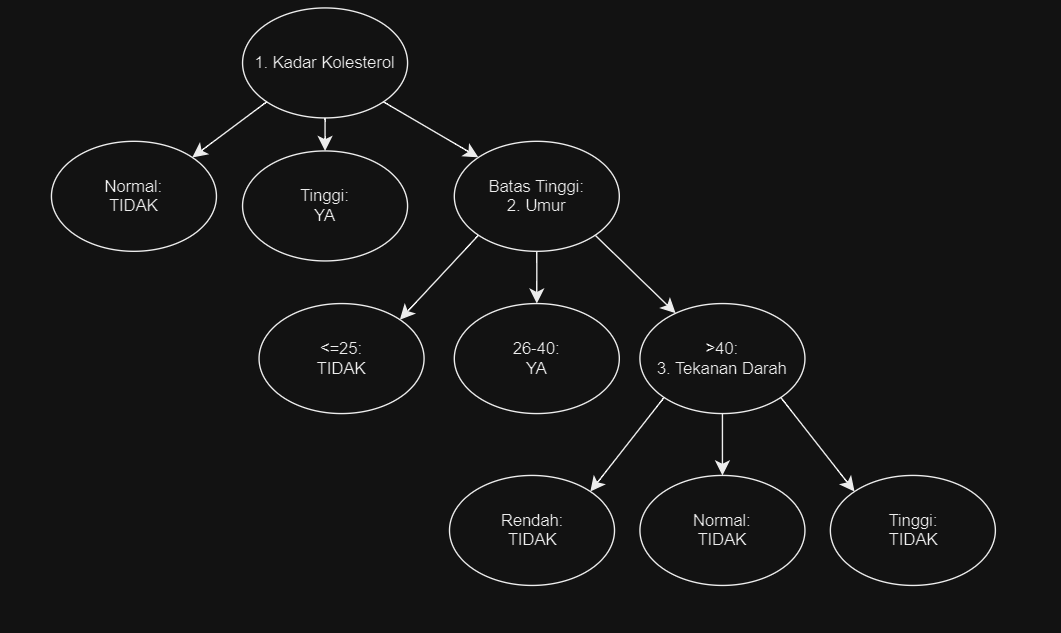

## Data Testing

In [184]:
df_diagnosis = df.copy()
new_data = '/content/drive/MyDrive/dataset/data_testing.csv' # Data Testing
input_data = pd.read_csv(new_data)

# df_diagnosis.tail()
input_data = input_data[['kadar_kolesterol','umur','tekanan_darah','jenis_kelamin']]
input_data

,kadar_kolesterol,umur,tekanan_darah,jenis_kelamin
0,Tinggi,>40,Tinggi,L
1,Normal,<=25,Normal,P
2,Tinggi,26-40,Tinggi,P
3,Batas Tinggi,>40,Normal,L
4,Batas Tinggi,26-40,Rendah,L


### Rule Based Classification

In [185]:
input_data['diagnosis_penyakit'] = None
for baris in range(len(input_data)):
    kolom = 0
    for nama_kolom in input_data.columns:
      if (nama_kolom == 'kadar_kolesterol'):
        if (input_data.iloc[baris,kolom] == 'Normal'):
          # input_data['diagnosis_penyakit'] = None
          input_data.iloc[baris, -1] = 'TIDAK'
          break
        elif (input_data.iloc[baris,kolom] == 'Tinggi'):
          # input_data['diagnosis_penyakit'] = None
          input_data.iloc[baris, -1] = 'YA'
          break
        if (input_data.iloc[baris,kolom] == 'Batas Tinggi'):
          kolom += 1
          continue
      elif (nama_kolom == 'umur'):
        if (input_data.loc[baris,'umur'] == '<=25'):
          # input_data['diagnosis_penyakit'] = None
          input_data.iloc[baris, -1] = 'TIDAK'
        elif (input_data.loc[baris,'umur'] == '26-40'):
          # input_data['diagnosis_penyakit'] = None
          input_data.iloc[baris, -1] = 'YA'
        elif (input_data.loc[baris,'umur'] == '>40'):
          kolom += 1
          continue
      elif (nama_kolom == 'tekanan_darah'):
        # input_data['diagnosis_penyakit'] = None
        input_data.iloc[baris, -1] = 'TIDAK'
        break
      else:
        break
    continue


In [186]:
input_data = input_data[['umur', 'jenis_kelamin', 'tekanan_darah', 'kadar_kolesterol', 'diagnosis_penyakit']]
input_data

,umur,jenis_kelamin,tekanan_darah,kadar_kolesterol,diagnosis_penyakit
0,>40,L,Tinggi,Tinggi,YA
1,<=25,P,Normal,Normal,TIDAK
2,26-40,P,Tinggi,Tinggi,YA
3,>40,L,Normal,Batas Tinggi,TIDAK
4,26-40,L,Rendah,Batas Tinggi,TIDAK


### Input Data

In [187]:
df_diagnosis # df Lama

,umur,jenis_kelamin,tekanan_darah,kadar_kolesterol,diagnosis_penyakit
0,>40,L,Tinggi,Tinggi,YA
1,<=25,P,Normal,Normal,TIDAK
2,>40,L,Tinggi,Batas Tinggi,TIDAK
3,<=25,P,Rendah,Normal,TIDAK
4,>40,L,Tinggi,Tinggi,YA
5,26-40,P,Normal,Batas Tinggi,YA
6,>40,L,Normal,Normal,TIDAK
7,<=25,P,Normal,Tinggi,YA
8,>40,L,Normal,Batas Tinggi,TIDAK
9,26-40,P,Tinggi,Tinggi,YA


In [188]:
# Input Data Testing ke Data Diagnosis (Copy-an)
assert list(df_diagnosis.columns) == list(input_data.columns), "Kolom tidak cocok!"
df_diagnosis = pd.concat([df_diagnosis, input_data], ignore_index=True)

In [205]:
# Input Data Testing ke Dataset Sample
assert list(df.columns) == list(input_data.columns), "Kolom tidak cocok!"
df = pd.concat([df, input_data], ignore_index=True)

In [189]:
df_diagnosis # Setelah data baru diinput

,umur,jenis_kelamin,tekanan_darah,kadar_kolesterol,diagnosis_penyakit
0,>40,L,Tinggi,Tinggi,YA
1,<=25,P,Normal,Normal,TIDAK
2,>40,L,Tinggi,Batas Tinggi,TIDAK
3,<=25,P,Rendah,Normal,TIDAK
4,>40,L,Tinggi,Tinggi,YA
5,26-40,P,Normal,Batas Tinggi,YA
6,>40,L,Normal,Normal,TIDAK
7,<=25,P,Normal,Tinggi,YA
8,>40,L,Normal,Batas Tinggi,TIDAK
9,26-40,P,Tinggi,Tinggi,YA


In [204]:
df

,umur,jenis_kelamin,tekanan_darah,kadar_kolesterol,diagnosis_penyakit
0,>40,L,Tinggi,Tinggi,YA
1,<=25,P,Normal,Normal,TIDAK
2,>40,L,Tinggi,Batas Tinggi,TIDAK
3,<=25,P,Rendah,Normal,TIDAK
4,>40,L,Tinggi,Tinggi,YA
5,26-40,P,Normal,Batas Tinggi,YA
6,>40,L,Normal,Normal,TIDAK
7,<=25,P,Normal,Tinggi,YA
8,>40,L,Normal,Batas Tinggi,TIDAK
9,26-40,P,Tinggi,Tinggi,YA
